# **Assignment 3 Data Science**

**Team members:** Michael Danial 13004528 T-15, Ali Tharwat 13004222 T-1, Sherif Tamer 13004065 T-4

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# a) Data exploration and pre-processing

In [2]:
#--- Import necessary libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# 1) Setup
# --- Load the Mall Customers dataset ---
df = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")

# --- Initial exploration ---
print("First 5 rows of the dataset:\n", df.head(), "\n")
print("Dataset information:")
df.info()
print("\nSummary statistics:\n", df.describe())

# --- Check for missing values ---
print("\nMissing values in each column:\n", df.isnull().sum())

# --- Encode 'Gender' column (Male = 1, Female = 0) ---
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre']) #assumed to be gender, written as "Genre" in the dataset (.csv)


First 5 rows of the dataset:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Su

In [4]:
# 2) Feature Scaling

# --- Select relevant features for clustering ---
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# --- Feature Scaling using Standardization ---
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# --- Create a new DataFrame with scaled features ---
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# --- Show the standardized data preview ---
print("\nScaled feature data (first 5 rows):\n", scaled_df.head())



Scaled feature data (first 5 rows):
         Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


# b) Dimensionality Reduction and Data Visualization

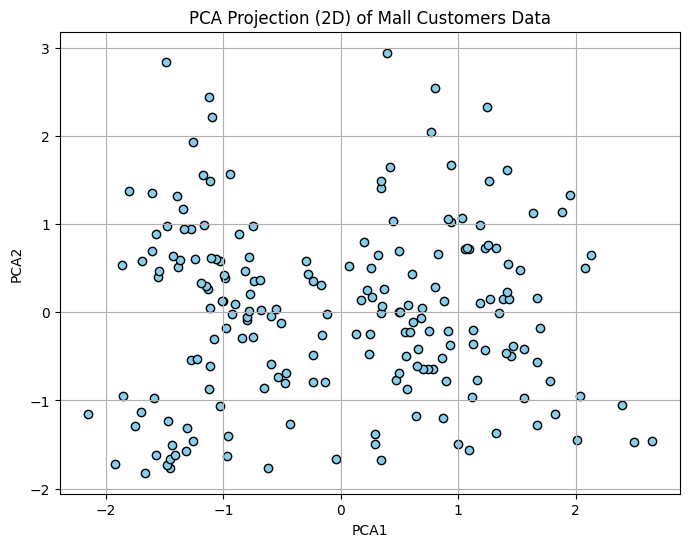

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Apply PCA to reduce dimensions to 2 for visualization ---
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# --- Create a DataFrame for PCA components ---
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# --- Visualize the 2D projection of PCA --- // NOT REQUIRED BUT WE DID IT
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c='skyblue', edgecolor='k')
plt.title('PCA Projection (2D) of Mall Customers Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


# c) Determining the Optimal Number of Clusters:

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

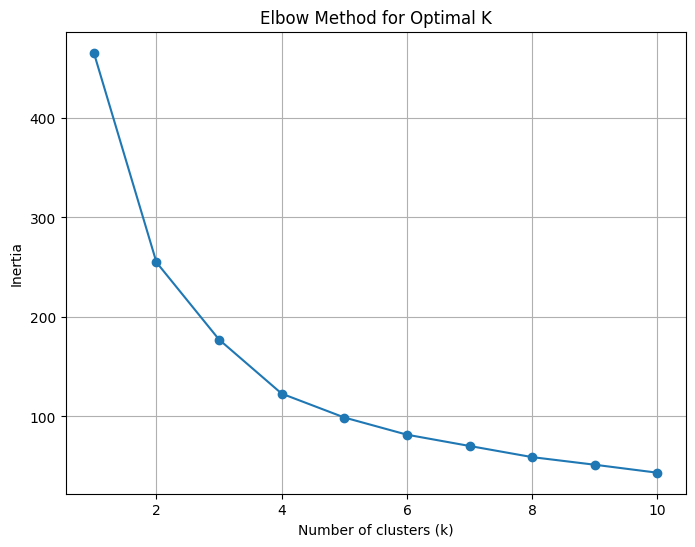

In [6]:
from sklearn.cluster import KMeans

# --- Use the Elbow Method to find the optimal number of clusters ---
inertia = []

for k in range(1, 11): # from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# --- Plot the elbow curve ---
plt.figure(figsize=(8, 6))
plt.plot( range(1,11) , inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# d) Model Training with K-Means

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


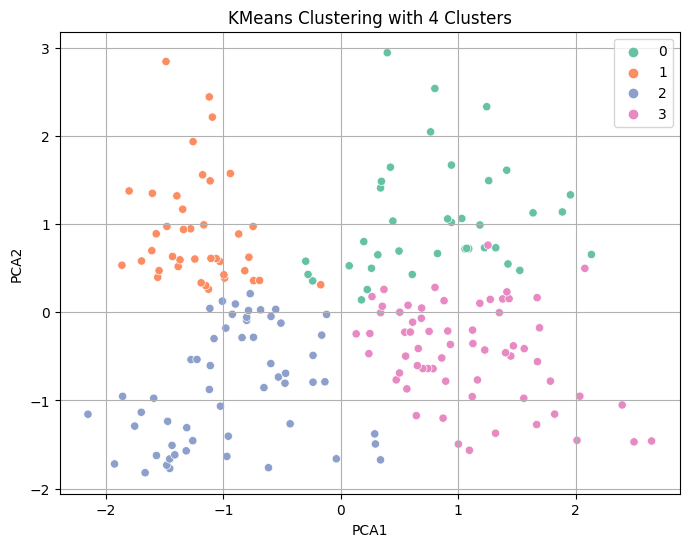

Cluster 0: 38
Cluster 1: 40
Cluster 2: 57
Cluster 3: 65


In [7]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# --- Choosing the optimal number of clusters based on the elbow method ---
optimal_k = 4

# --- Fit KMeans with the optimal number of clusters ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# --- Add cluster labels to our latest DataFrame---
pca_df['KMeans Cluster'] = kmeans_labels

# --- Plot the clustering result ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='KMeans Cluster', palette='Set2')
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

# --- Counts of Each Cluster ---
counts = pca_df['KMeans Cluster'].value_counts().sort_index()
for cluster, cnt in counts.items():
    print(f"Cluster {cluster}: {cnt}")


# e) Additional Clustering Techniques:


In [8]:
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
import numpy as np

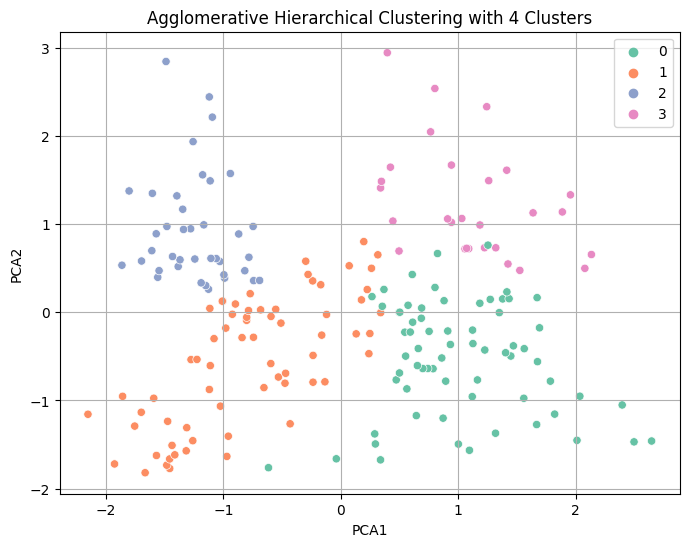

Cluster 0: 67
Cluster 1: 66
Cluster 2: 39
Cluster 3: 28


In [9]:
# 1. Agglomerative Hierarchical Clustering :

# --- Apply Agglomerative Clustering ---
agg = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg.fit_predict(scaled_df)

# --- Add cluster labels to our latest DataFrame---
pca_df['Agglomerative'] = agg_labels

# --- Plot the clustering result ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Agglomerative', palette='Set2')
plt.title(f'Agglomerative Hierarchical Clustering with {optimal_k} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

# --- Counts of Each Cluster ---
counts = pca_df['Agglomerative'].value_counts().sort_index()
for cluster, cnt in counts.items():
    print(f"Cluster {cluster}: {cnt}")

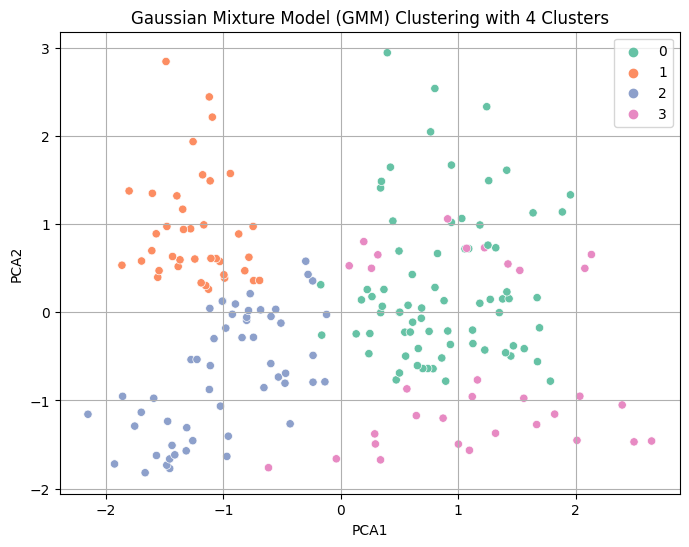

Cluster 0: 75
Cluster 1: 39
Cluster 2: 54
Cluster 3: 32


In [10]:
# 2. Gaussian Mixture Model (GMM):

# --- Apply Gaussian Mixture Model (GMM) ---
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

# --- Add cluster labels to our latest DataFrame---
pca_df['GMM'] = gmm_labels

# --- Plot the clustering result ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='GMM', palette='Set2')
plt.title(f'Gaussian Mixture Model (GMM) Clustering with {optimal_k} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

# --- Counts of Each Cluster ---
counts = pca_df['GMM'].value_counts().sort_index()
for cluster, cnt in counts.items():
    print(f"Cluster {cluster}: {cnt}")

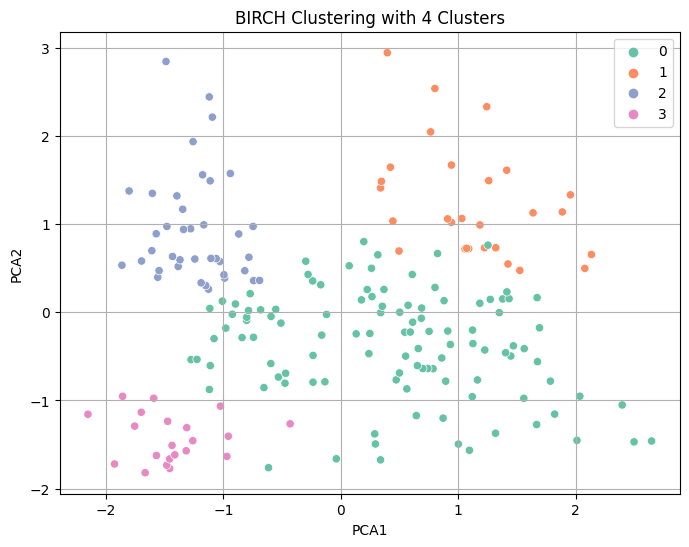

Cluster 0: 112
Cluster 1: 28
Cluster 2: 39
Cluster 3: 21


In [11]:
# 3. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies):

# --- Apply BIRCH ---
birch = Birch(n_clusters=optimal_k)
birch_labels = birch.fit_predict(scaled_df)

# --- Add cluster labels to our latest DataFrame---
pca_df['BIRCH'] = birch_labels

# --- Plot the clustering result ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='BIRCH', palette='Set2')
plt.title(f'BIRCH Clustering with {optimal_k} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

# --- Counts of Each Cluster ---
counts = pca_df['BIRCH'].value_counts().sort_index()
for cluster, cnt in counts.items():
    print(f"Cluster {cluster}: {cnt}")

# f) Evaluation and Comparison:

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# --- Define a function to evaluate clustering performance ---
def evaluate_clustering(name, labels):
    sil_score = silhouette_score(scaled_df, labels)
    db_score = davies_bouldin_score(scaled_df, labels)
    print(f"{name} Clustering:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}\n")

# --- Evaluate each clustering method ---
evaluate_clustering("KMeans", kmeans_labels)
evaluate_clustering("Agglomerative", agg_labels)
evaluate_clustering("GMM", gmm_labels)
evaluate_clustering("BIRCH", birch_labels)


KMeans Clustering:
  Silhouette Score: 0.4040
  Davies-Bouldin Index: 0.9308

Agglomerative Clustering:
  Silhouette Score: 0.3615
  Davies-Bouldin Index: 1.0164

GMM Clustering:
  Silhouette Score: 0.3379
  Davies-Bouldin Index: 1.3052

BIRCH Clustering:
  Silhouette Score: 0.3060
  Davies-Bouldin Index: 1.0369



# g) Visualization of clustering results

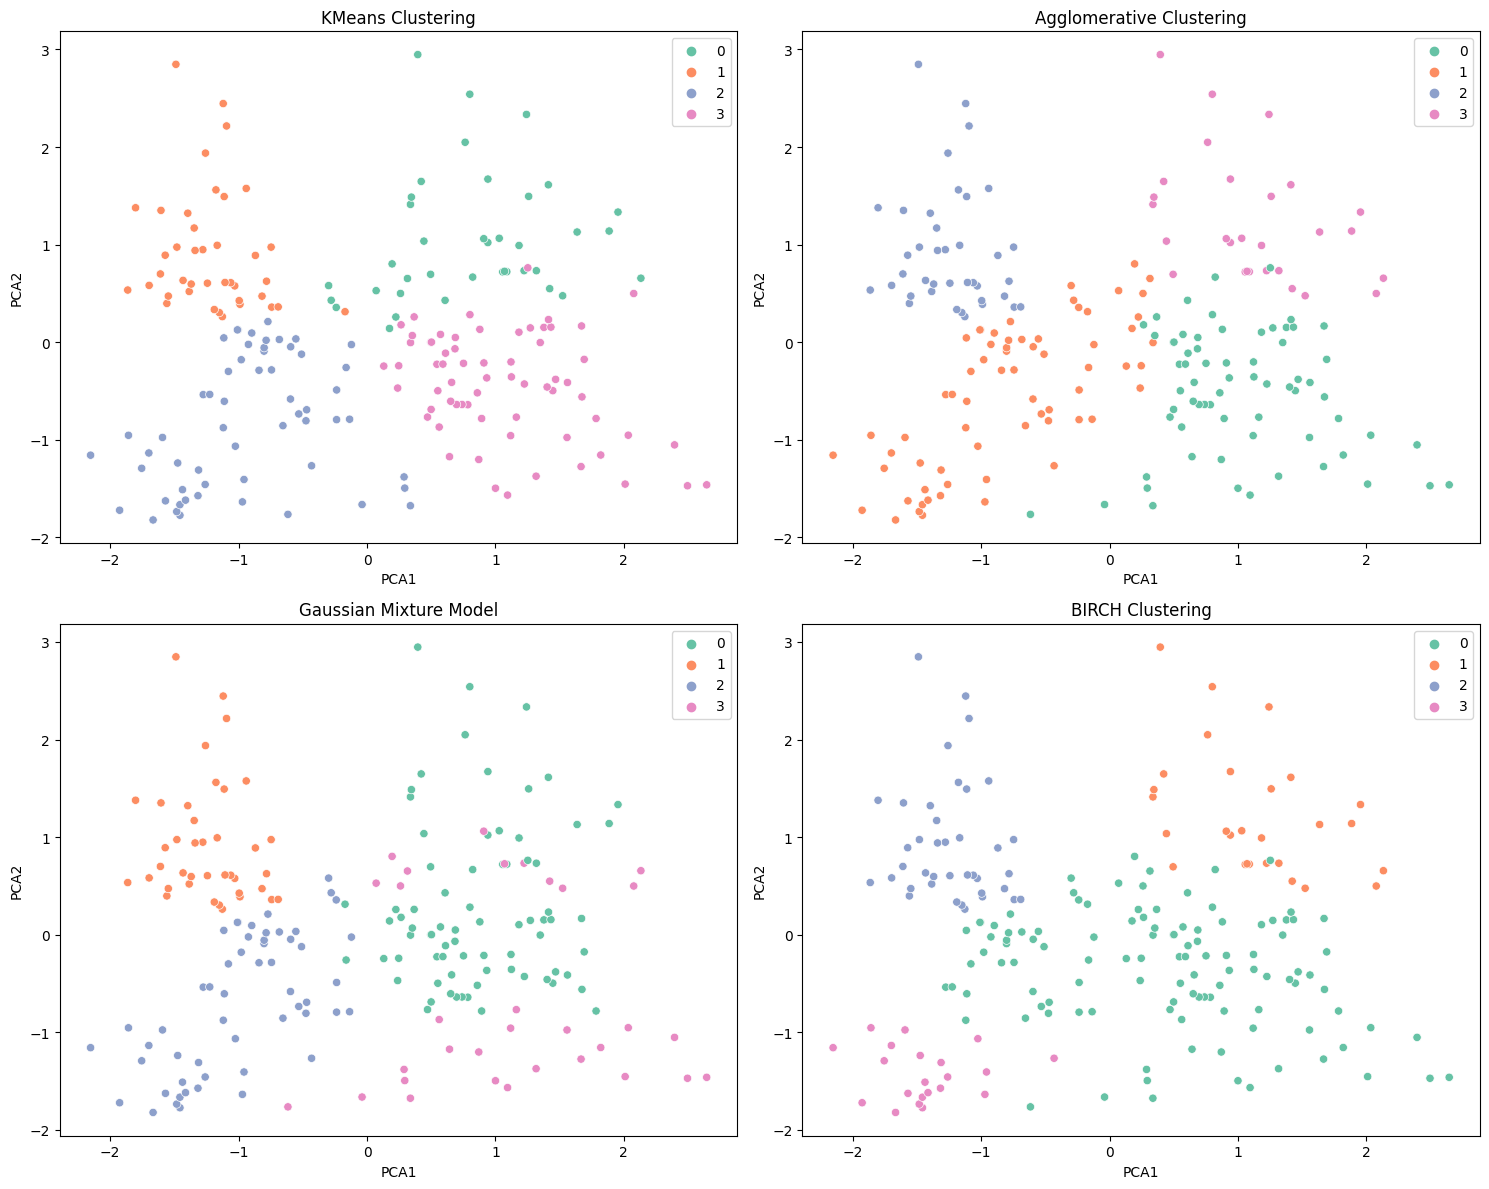

In [13]:
# --- Plot PCA-based cluster visualizations for each method ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
methods = ['KMeans Cluster', 'Agglomerative', 'GMM', 'BIRCH']
titles = ['KMeans Clustering', 'Agglomerative Clustering', 'Gaussian Mixture Model', 'BIRCH Clustering']

for ax, method, title in zip(axes.flatten(), methods, titles):
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue=method, palette='Set2', ax=ax)
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


# h) Interpretations:

- **KMeans**:
  - Provided well-separated and compact clusters.
  - Achieved the highest Silhouette Score, indicating good cohesion within clusters.
  - Most suitable when clusters are spherical and balanced in size.

- **Agglomerative Clustering**:
  - Performed similarly to KMeans but with slightly less separation between some clusters.
  - Useful when the data may have hierarchical relationships.
  - Slightly lower evaluation scores than KMeans.

- **Gaussian Mixture Model (GMM)**:
  - Allowed soft clustering, assigning probabilities to each point's membership.
  - Performed well when some clusters had overlapping boundaries.
  - Provided flexibility in modeling different cluster shapes, but may be sensitive to initialization.

- **BIRCH**:
  - Efficient and scalable, especially with large datasets.
  - However here we had small dataset , which produced unbalanced clusters
  - Highest Davies-Bouldin Index

### Final Conclusion:
KMeans emerged as the most effective clustering technique for this dataset due to its:
- High Silhouette Score,
- Clear cluster boundaries,
- Simplicity and interpretability.

It effectively segments customers based on income and spending behavior, which is valuable for targeted marketing or personalized service strategies.